**HEADER**
We decied our best neighborhood based on how safe each neighborhood. We spilt safety into three catergoies crime, traffic, fire incidents. 


**CRIME**
explain crime reasoning 

**FIRE INCIDENTS**
explain reasoning 

The other ascept of rating the best neighborhood is fire incidents. The data below is pulled from Kali's.ipynb which has the steps of how it got here. The data below is the top 10 neigborhoods with the least amount of fire incidents then catergioes into what type of incident and how many of each there was per negiborhood. The reason for this is because if it was simpliy going by the amount of fires a building fire and a contained fire would have the same amount of threat level. This way the fires are ranked by how dangerous each is on a scale of 0-10. The more dangerous life threating or protery damage a fire does the high it is on the scale. This way if let's say negiborhood A has 3 fires but they are class 111 (building fire) and negiborhood B has 4 fire two 113 (contained fire) and two 131 (vechile fire) negiborhood B would be classifed as safer even though it has more fires the threat level is lower. The final part is putting it in a graph and comparing the data to the other charts of crime and traffic. 

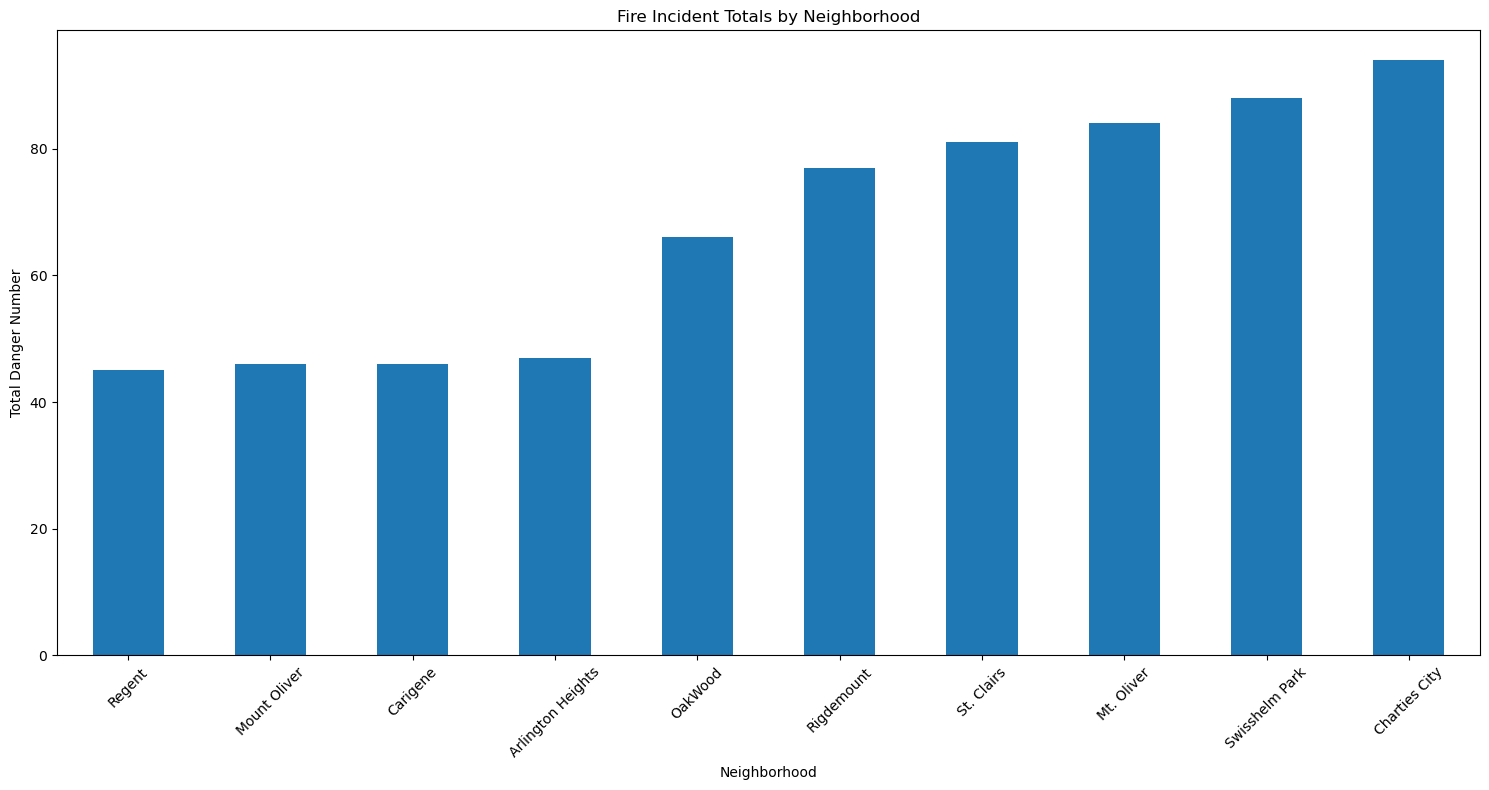

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
fire= pd.read_csv("Kali'sFiredata.csv")
fire111= 9
fire131= 7
fire150=6
fire113=1
fire151=6
fire100=3
fire132= 7
fire160=5
fire143=6
fire130=4
fire112=5
fire153=7
fire142=6
fire140=5
fire118=3
fire154=5
fire116=1
fire141=8
fire162=4
fire114=4
# MOUNT OLIVER
mount_Total= fire111*2+fire100+fire150*1+fire132+fire151*2

#Regent 
regent_Total= fire151*2+fire113*2+fire150+fire160+fire111+fire131+fire130

#Carigene
carigene_Total= fire113*4+fire143+fire130+fire112+fire111*3

#Rigdemount
rig_Total= fire131*5+fire153+fire142+fire150+fire143+fire132+fire140*2

#Mt.Oliver
oilver_Total=fire111*6+fire151*2+fire150*2+fire140+fire113

#Arligington Heights
ar_Total= fire113*7+fire131+fire118+fire142+fire150+fire111*2

#OakWood
oak_Total= fire111*4+fire113*4+fire151*2+fire118+fire150+fire154

#st.Clairs
st_Total= fire131*4+fire142*2+fire140*2+fire150*2+fire113+fire118+fire116+fire111+fire154

#SwisshelmPark
swiss_Total= fire113*4+fire111*3+fire150*3+fire160+fire141+fire162+fire142+fire154+fire131+fire114

#Charties City
char_Tota= fire111*5+fire113*3+fire151*2+fire131+fire160+fire154+fire142+fire130+fire132

neighborhood_totals = {"Mount Oliver": mount_Total,"Regent": regent_Total,"Carigene": carigene_Total,"Rigdemount": rig_Total,"Mt. Oliver": oilver_Total,"Arlington Heights": ar_Total,"OakWood": oak_Total,"St. Clairs": st_Total,"Swisshelm Park": swiss_Total,"Charties City": char_Tota}
totals_series = pd.Series(neighborhood_totals).sort_values()
incident_Plot = totals_series.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Neighborhood')
plt.ylabel('Total Danger Number')
plt.title('Fire Incident Totals by Neighborhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Traffic**
explain reasoning

Span of data is 16614.0.

neighborhood
South Side Flats             1.970000
Allegheny West               1.868211
Lincoln Place                1.859338
Central Business District    1.808183
Lincoln-Lemington-Belmar     1.805185
Bluff                        1.752615
Central Northside            1.751356
Upper Hill                   1.706207
Central Lawrenceville        1.686504
Spring Hill-City View        1.624096
Highland Park                1.592740
New Homestead                1.576835
Bloomfield                   1.574118
West Oakland                 1.571330
Perry South                  1.568556
Windgap                      1.549771
Knoxville                    1.526815
Marshall-Shadeland           1.525972
Central Oakland              1.523418
Fineview                     1.511702
East Allegheny               1.511116
Manchester                   1.477648
Lower Lawrenceville          1.477432
Carrick                      1.433373
Morningside                  1.413575
Summer Hill

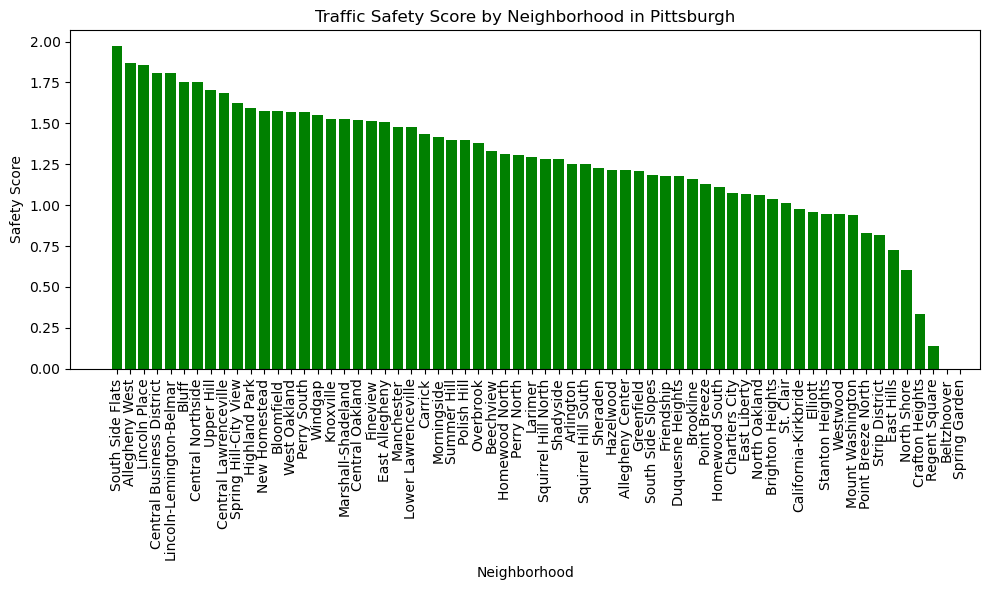

In [2]:
#Read in data
data = pd.read_csv("traffic_data.csv")
data = data.dropna(subset=['average_daily_car_traffic']) #eliminate the bike study from the data

#Some neighborhoods have more studies done than others.
#To eliminate this factor, we need to take the mean
#of all the studies done per neighborhood
trafficData = data.groupby('neighborhood')['average_daily_car_traffic'].mean().sort_values(ascending=True)

#Beginning of the graph that shows the percent of
#cars that went over the limit in each neighborhood
speedOverLimit = data.groupby('neighborhood')['percent_over_limit'].mean().sort_values(ascending=True)

#Begining of the bar chart that adds these two criteria
#together that forms a score for the safety of each
#neighborhood

#The idea is:
    #The higher the score = a safer neighborhood
    #The lower the score = a less safe neighborhood

#Variable for 1st criteria
span = trafficData.max()-trafficData.min()

print("Span of data is " + str(span) +".")
print("")

neighborhood_stats = data.groupby('neighborhood')[['average_daily_car_traffic', 'percent_over_limit']].mean()
neighborhood_stats['safety_score'] = ((100 - speedOverLimit) / 100) + ((trafficData.max() - trafficData)/(span))
neighborhood_stats = neighborhood_stats.sort_values('safety_score', ascending=False)
print(neighborhood_stats['safety_score'].to_string())

plt.figure(figsize=(10,6))
plt.bar(neighborhood_stats.index, neighborhood_stats['safety_score'], color='green')
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Safety Score")
plt.title("Traffic Safety Score by Neighborhood in Pittsburgh")
plt.tight_layout()
plt.show()